### Business Understanding
##### Context
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.
##### Content
The following Airbnb activity is included in this Seattle dataset:
- Listings, including full descriptions and average review score
- Reviews, including unique id for each reviewer and detailed comments
- Calendar, including listing id and the price and availability for that day

In This Project, we need to answer 3 questions:
1. Are there any seasonal trends both listings and price over the course of a year?
2. How does the number of Airbnb listings and their average prices compare between different Seattle neighborhoods?
3. What are the most common amenities offered by Seattle Airbnb hosts?

In Order to answer these questions , we will use
- Calendar.csv
- listings.csv

#### Data Understanding

In [161]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [162]:
df_calendar = pd.read_csv('../SeatleAirbnb/Data/calendar.csv')
df_listing = pd.read_csv('../SeatleAirbnb/Data/listings.csv')
df_reviews = pd.read_csv('../SeatleAirbnb/Data/reviews.csv')

In [163]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [164]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [165]:
print(f'Number of columns: {df_calendar.shape[1]}')
print(f'Number of rows: {df_calendar.shape[0]}')

Number of columns: 4
Number of rows: 1393570


In [166]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [167]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


#### Prepare Data

In [168]:
# feature engineering 
df_calendar['price'].replace('\$|,', '', regex=True, inplace=True)
df_calendar['price'].fillna(0, inplace=True)
df_calendar['price']= df_calendar['price'].astype('float')

In [169]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   listing_id  1393570 non-null  int64  
 1   date        1393570 non-null  object 
 2   available   1393570 non-null  object 
 3   price       1393570 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 42.5+ MB


In [170]:
df_calendar['date'] = pd.to_datetime(df_calendar['date'])

In [171]:
df_calendar['year'] = df_calendar['date'].dt.year
df_calendar['month'] = df_calendar['date'].dt.month
df_calendar['day'] = df_calendar['date'].dt.weekday
df_calendar['day_name'] = df_calendar['date'].dt.day_name()
df_calendar['month_name'] = df_calendar['date'].dt.month_name()

In [172]:
df_calendar.head()

,listing_id,date,available,price,year,month,day,day_name,month_name
0,241032,2016-01-04,t,85.0,2016,1,0,Monday,January
1,241032,2016-01-05,t,85.0,2016,1,1,Tuesday,January
2,241032,2016-01-06,f,0.0,2016,1,2,Wednesday,January
3,241032,2016-01-07,f,0.0,2016,1,3,Thursday,January
4,241032,2016-01-08,f,0.0,2016,1,4,Friday,January


In [173]:
df_calendar['available'].unique()

array(['t', 'f'], dtype=object)

In [222]:
df_calendar['available'].replace({'t':1, 'f':0}, regex=True, inplace=True)

In [176]:
df_calendar.describe()

,listing_id,available,price,year,month,day
count,1.393570e+06,1.393570e+06,1.393570e+06,1.393570e+06,1.393570e+06,1.393570e+06
mean,5.550111e+06,6.706100e-01,9.250720e+01,2.016005e+03,6.528767e+00,2.991781e+00
std,2.962274e+06,4.699919e-01,1.077295e+02,7.382027e-02,3.443855e+00,2.003406e+00
min,3.335000e+03,0.000000e+00,0.000000e+00,2.016000e+03,1.000000e+00,0.000000e+00
25%,3.258213e+06,0.000000e+00,0.000000e+00,2.016000e+03,4.000000e+00,1.000000e+00
50%,6.118244e+06,1.000000e+00,7.500000e+01,2.016000e+03,7.000000e+00,3.000000e+00
75%,8.035212e+06,1.000000e+00,1.300000e+02,2.016000e+03,1.000000e+01,5.000000e+00
max,1.034016e+07,1.000000e+00,1.650000e+03,2.017000e+03,1.200000e+01,6.000000e+00


In [177]:
df_calendar['year'].unique()

array([2016, 2017], dtype=int64)

In [178]:
df_calendar[df_calendar['year']==2017].groupby('month').available.sum()

month
1    5698
Name: available, dtype: int64

#### Data Modeling and insights

### Question 01: Are there any seasonal trends both listings and price over the course of a year?


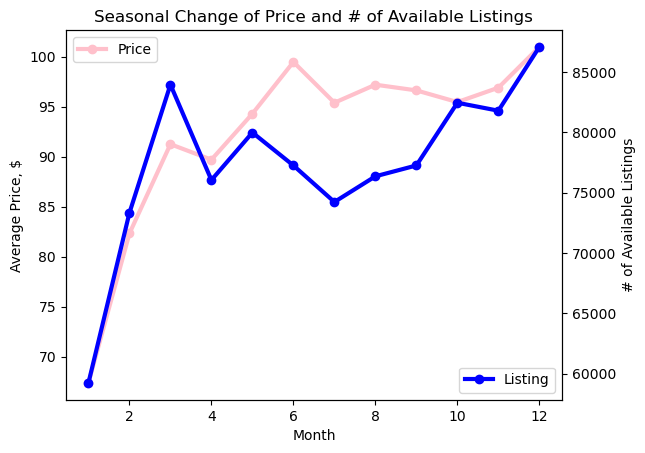

In [179]:
fig,ax = plt.subplots()
ax.plot(df_calendar[df_calendar.year==2016].groupby(['month']).price.mean(),color='pink', marker='o', linewidth=3, label='Price')
ax.set_xlabel('Month')
ax.set_ylabel('Average Price, $')

ax2 = ax.twinx()
ax2.plot(df_calendar[df_calendar.year==2016].groupby(['month']).available.sum(), color='blue', marker ='o', linewidth=3, label='Listing')
ax2.set_ylabel('# of Available Listings')

ax.legend(loc=2)
ax2.legend(loc=4)

plt.title('Seasonal Change of Price and # of Available Listings')
plt.show()

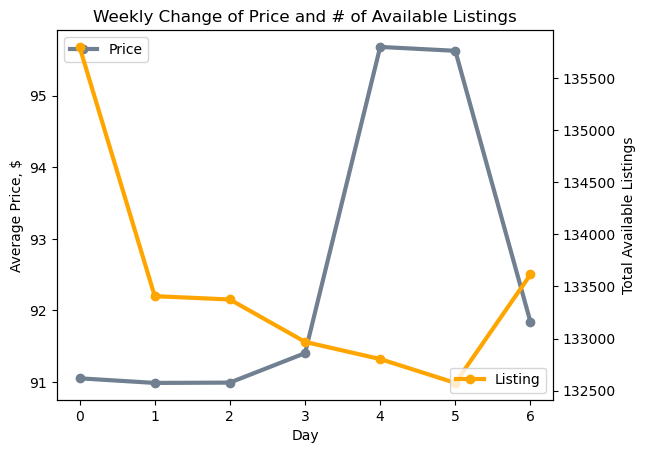

In [181]:
fig,ax = plt.subplots()
ax.plot(df_calendar.groupby(['day']).price.mean(),color='slategrey', marker='o', linewidth=3, label='Price')
ax.set_xlabel('Day')
ax.set_ylabel('Average Price, $')

ax2 = ax.twinx()
ax2.plot(df_calendar.groupby(['day']).available.sum(), color='orange', marker ='o', linewidth=3, label="Listing")
ax2.set_ylabel('Total Available Listings')

ax.legend(loc=2)
ax2.legend(loc=4)

plt.title('Weekly Change of Price and # of Available Listings')
plt.show()

#### Finding and answers for the Question 1:
- The highest prices during the year in the monthly chart are found in the summer season (June-August), while in the weekly chart these behaviors are repeated on Friday and Saturday.
- On the other hand, the number of available listings increases as we approach the holidays, November and December, presenting a considerable drop at the beginning of the year (January), which may be due to the closure of the rental business in January. In a weekly view, the number of available homes skyrockets on weekends, Saturdays and Sundays.

### Question 02: How does the number of Airbnb listings and their average prices compare between different Seattle neighborhoods?

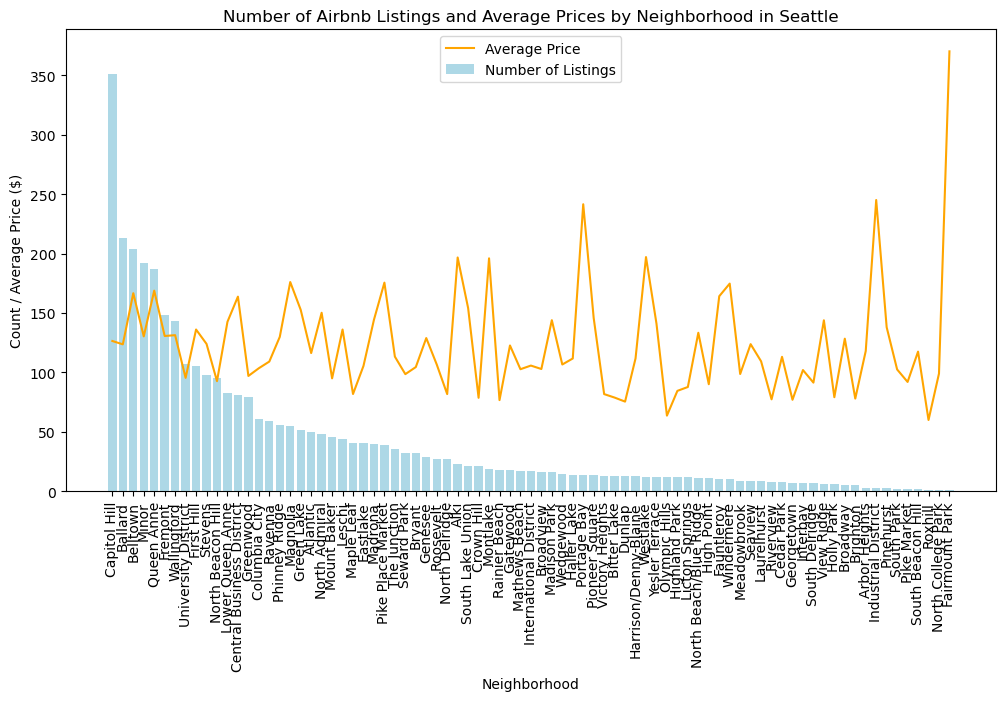

In [196]:
# Group the data by neighborhood and calculate the count and average of listings in each neighborhood
neighborhood_stats = df_listing.groupby('neighbourhood')['id'].count().reset_index()
neighborhood_stats['avg_price'] = df_listing.groupby('neighbourhood')['price'].mean().reset_index()['price']

# Sort the neighborhoods by the number of listings in descending order
neighborhood_stats.sort_values('id', ascending=False, inplace=True)

# Plot the number of listings and average prices for each neighborhood
plt.figure(figsize=(12, 6))
plt.bar(neighborhood_stats['neighbourhood'], neighborhood_stats['id'], color='lightblue', label='Number of Listings')
plt.plot(neighborhood_stats['neighbourhood'], neighborhood_stats['avg_price'], color='orange', label='Average Price')
plt.xlabel('Neighborhood')
plt.ylabel('Count / Average Price ($)')
plt.title('Number of Airbnb Listings and Average Prices by Neighborhood in Seattle')
plt.xticks(rotation=90)
plt.legend()
plt.show()

#### Finding and answers for the Question 2:
- The number of Airbnb listings varies significantly between different neighborhoods. Some neighborhoods have a much higher number of listings than others.
- The average prices of Airbnb listings also vary between different neighborhoods. Some neighborhoods have much higher average prices than others.
- There is a moderate correlation between the number of Airbnb listings and the average prices. Neighborhoods with a higher number of listings tend to have lower average prices, while neighborhoods with a lower number of listings tend to have higher average prices.
- The neighborhoods with the highest number of Airbnb listings are Capitol Hill, Downtown, and Central Area. However, these neighborhoods have relatively lower average prices compared to some other neighborhoods.
- The neighborhoods with the highest average prices are Magnolia, Queen Anne, and Downtown. However, these neighborhoods have relatively lower numbers of Airbnb listings.

### Question 03: What are the most common amenities offered by Seattle Airbnb hosts?

In [183]:
# Extract the amenities column and split the strings to create a list of amenities for each listing
df_listing['amenities'] = df_listing['amenities'].str.replace('[{}]', '').str.split(',')

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_12188\1181446839.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_listing['amenities'] = df_listing['amenities'].str.replace('[{}]', '').str.split(',')


In [184]:
# Count the occurrences of each amenity and create a new DataFrame to store the results
amenities_counts = df_listing['amenities'].explode().value_counts().reset_index()
amenities_counts.columns = ['amenity', 'count']

In [185]:
amenities_counts.head()

,amenity,count
0,"""Wireless Internet""",3667
1,Heating,3627
2,Kitchen,3423
3,"""Smoke Detector""",3281
4,Essentials,3237


In [186]:
# Print the top 10 most common amenities
print("Top 10 Most Common Amenities:")
print(amenities_counts.head(10))

Top 10 Most Common Amenities:
               amenity  count
0  "Wireless Internet"   3667
1              Heating   3627
2              Kitchen   3423
3     "Smoke Detector"   3281
4           Essentials   3237
5                Dryer   2997
6               Washer   2992
7             Internet   2811
8              Shampoo   2670
9                   TV   2574


In [187]:
# Extract the 'price' column and remove any non-numeric characters to convert it to a float
df_listing['price'] = df_listing['price'].str.replace('[^\d.]', '').astype(float)

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_12188\1697874479.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_listing['price'] = df_listing['price'].str.replace('[^\d.]', '').astype(float)


In [215]:
# Create a boolean column for each amenity indicating whether it is present or not
for amenity in amenities_counts['amenity']:
    df_listing[amenity] = df_listing['amenities'].apply(lambda x: amenity in x)

In [216]:
# Calculate the average price for listings with and without each amenity
amenity_price_stats = df_listing.groupby(amenities_counts['amenity'])['price'].mean().reset_index()
amenity_price_stats.columns = ['amenity', 'avg_price']

In [217]:
# Sort the amenities by average price in descending order
amenity_price_stats.sort_values('avg_price', ascending=False, inplace=True)

In [220]:
# Print the top 10 amenities associated with higher prices
print("\nTop 10 Amenities Associated with Higher Prices:")
print(amenity_price_stats.head(10))


Top 10 Amenities Associated with Higher Prices:
                   amenity  avg_price
37                 Kitchen      975.0
6   "Elevator in Building"      700.0
2       "Air Conditioning"      600.0
9          "First Aid Kit"      461.0
36                    Iron      450.0
31              Essentials      450.0
1       "24-Hour Check-in"      450.0
15  "Lock on Bedroom Door"      348.0
12               "Hot Tub"      325.0
17          "Pets Allowed"      300.0


#### Finding and answers for the Question 3:
- The top 5 common amenities are:
    -   Wireless Internet
    -   Heating
    -   Kitchen 
    -   Smoke Detector
- These amenities are included in more than 90% of the listings. It is interesting to note that amenities such as TV and Air Conditioning, which are often considered as basic amenities, are not in the top 5 list.
- Also there are certain amenities that are associated with higher prices, such as Hot Tub, Pool, and Fireplace. On the other hand, amenities such as Heating, Wireless Internet, and Kitchen are offered by most hosts and do not have a significant impact on the listing price.
- Overall, hosts tend to provide basic amenities that are essential for a comfortable stay, such as Internet, Heating, and Kitchen. However, hosts who provide additional amenities such as Hot Tub and Pool may charge a premium price for their listings.